<a href="https://colab.research.google.com/github/samcom12/data_science_course/blob/main/Assigment_01_19_08_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use the given file named cricket.csv and perform the following operations:


1.   Read the file in DataFrame
2.   List the name of cricketer and their respective runs
3.   Find total wickets taken by them
4.   Find average of catches taken
5.   Find the name of wicketkeeper
6.   print the name of bowler who played highest number of matches
7.   Find average of all the bowlers
8.   Find name of the bowler with least bowling average (wickets per match).
9.   Print information about all players whose catches per match ratio is greater than 0.5
store it in a csv file.
10.   Draw the bar chart of playr name against their runs.
11.   Sort and print information about players by ascending order of runs
12.   print the names of players whose wickets are greater than matches


Dataset location: https://mitu.co.in/dataset

In [ ]:
import pandas as pd

url = 'https://github.com/samcom12/data_science_course/blob/main/dataset/cricket.csv?raw=true'
#df = pd.read_csv(url)
df = pd.read_csv(url, index_col=0)
df

,name,matches,runs,catches,wickets,stumpings
sr.no,,,,,,
1,Anil Dalpat,122,6755,56,12,0
2,Rohan Kanhay,144,1256,76,178,0
3,Avdhoot Dighe,265,8954,120,0,0
4,Bahubali,10,756,6,11,3
5,Leeladhar,234,2866,105,376,0
6,Pradyumna,177,5877,47,122,0
7,Dinesh Roy,211,8537,112,16,0
8,Parmeshwar,245,9466,53,0,0
9,Ali Durrani,55,2756,12,26,0


In [ ]:
df1 = df[['name', 'runs']]
df1

,name,runs
sr.no,,
1,Anil Dalpat,6755
2,Rohan Kanhay,1256
3,Avdhoot Dighe,8954
4,Bahubali,756
5,Leeladhar,2866
6,Pradyumna,5877
7,Dinesh Roy,8537
8,Parmeshwar,9466
9,Ali Durrani,2756


In [ ]:
total_wickets = sum(df['wickets'])
print(total_wickets)

790


In [ ]:
import numpy as np
catch_avg = np.mean(df['catches'])
print(catch_avg)

63.3


In [ ]:

wk = df[df['stumpings'] > 0]['name'].to_list()
print(wk)

['Bahubali']


In [ ]:

bowler_matches = df.groupby('name')['matches'].sum()
max_matches_bowler = bowler_matches.idxmax()
#max_matches = bowler_matches.max()
#print(bowler_matches)
print(max_matches_bowler)


Avdhoot Dighe


In [ ]:
#Considering bowler whose wickets are greater than zero
wickets = np.mean(df['wickets'])
print(wickets)

79.0


In [19]:

import pandas as pd
import numpy as np
url = 'https://github.com/samcom12/data_science_course/blob/main/dataset/cricket.csv?raw=true'
df4 = pd.read_csv(url, index_col=0)
df4_bowler = df4[(df4['wickets'] > 0) & (df4['stumpings'] == 0)]
df4_bowler['bowler_avg'] = df4_bowler['wickets'] / df4_bowler['matches']
#min_avg = min(df4_bowler['bowler_avg'])
min_avg = df4_bowler.loc[df4_bowler['bowler_avg'].idxmin()]
min_avg
print("Least Average Bowler is", min_avg['name'])


Least Average Bowler is Dinesh Roy


<ipython-input-19-ab991fcb3ffb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bowler['bowler_avg'] = df4_bowler['wickets'] / df4_bowler['matches']


In [20]:
df4['catches_per_match'] = df4['catches'] / df4['matches']
df_filtered = df4[df4['catches_per_match'] > 0.5]
print(df_filtered)
df_filtered.to_csv('players_with_high_catches_per_match.csv', index=False)

               name  matches  runs  catches  wickets  stumpings  \
sr.no                                                             
2      Rohan Kanhay      144  1256       76      178          0   
4          Bahubali       10   756        6       11          3   
7        Dinesh Roy      211  8537      112       16          0   
10     Litesh Singh       89  1099       46       49          0   

       catches_per_match  
sr.no                     
2               0.527778  
4               0.600000  
7               0.530806  
10              0.516854  


Text(0, 0.5, 'Runs')

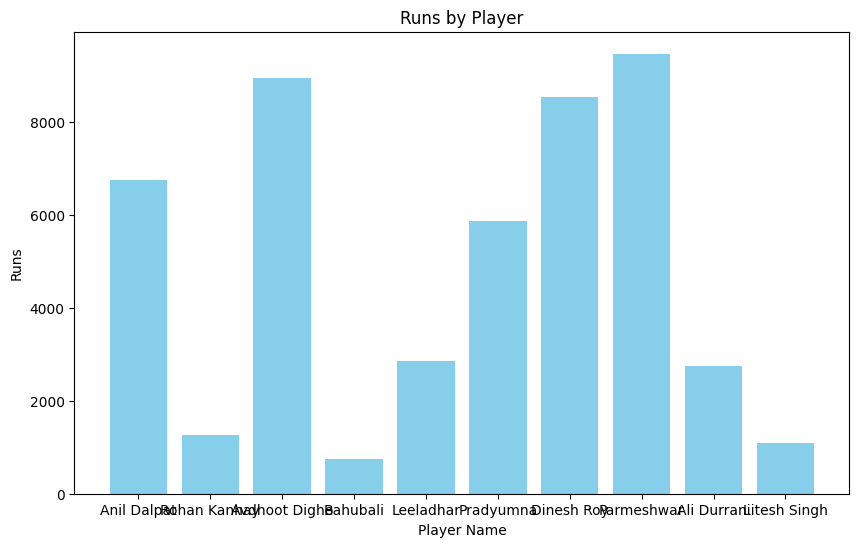

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
plt.bar(df4['name'], df4['runs'], color='skyblue')  # Create the bar chart

plt.title('Runs by Player')
plt.xlabel('Player Name')
plt.ylabel('Runs')


In [24]:
df_sorted = df4.sort_values(by='runs', ascending=True)
print(df_sorted)

                name  matches  runs  catches  wickets  stumpings  \
sr.no                                                              
4           Bahubali       10   756        6       11          3   
10      Litesh Singh       89  1099       46       49          0   
2       Rohan Kanhay      144  1256       76      178          0   
9        Ali Durrani       55  2756       12       26          0   
5          Leeladhar      234  2866      105      376          0   
6          Pradyumna      177  5877       47      122          0   
1        Anil Dalpat      122  6755       56       12          0   
7         Dinesh Roy      211  8537      112       16          0   
3      Avdhoot Dighe      265  8954      120        0          0   
8         Parmeshwar      245  9466       53        0          0   

       catches_per_match  
sr.no                     
4               0.600000  
10              0.516854  
2               0.527778  
9               0.218182  
5               0.448

In [25]:
df_filtered = df4[df4['wickets'] > df4['matches']]
df_filtered['name']

,name
sr.no,
2,Rohan Kanhay
4,Bahubali
5,Leeladhar
